<a href="https://colab.research.google.com/github/mittalanuj2409/Major-Project/blob/main/final_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from numpy import asarray

In [2]:
images=os.path.join("/content/drive/MyDrive/final")
Y = pd.read_csv(os.path.join("/content/drive/MyDrive/data3D.csv"))


In [3]:
a = os.listdir(images)

In [4]:
arr = np.array(a)

In [5]:
#appending the pics to the training data list
path = images
training_data = []
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(80,80))
    training_data.append([pic])

In [6]:
np.save(os.path.join(path,'features'),np.array(training_data))

In [7]:
saved = np.load(os.path.join(path,'features.npy'))

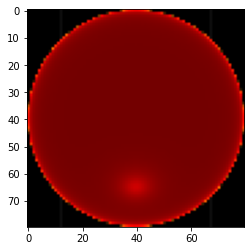

In [8]:
plt.imshow(saved[0].reshape(80,80,3))
plt.imshow(np.array(training_data[0]).reshape(80,80,3))

In [118]:
Y = pd.read_csv(os.path.join("/content/drive/MyDrive/data3D.csv"))

In [119]:
Y.shape

(3057, 4)

In [120]:
train_X = saved.reshape(-1, 80,80, 3)
#test_X = Y.reshape(-1, 28,28, 1)
train_X.shape, Y.shape

((3057, 80, 80, 3), (3057, 4))

In [121]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(train_X,Y, test_size=0.2, random_state=13)

In [122]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((2445, 80, 80, 3), (612, 80, 80, 3), (2445, 4), (612, 4))

In [174]:
from keras.layers import Dense, Conv2D, Flatten

In [198]:
model = Sequential()
model.add(Conv2D(16, 2, activation="relu", input_shape=(80,80, 3), kernel_initializer='he_uniform'))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(4))
model.compile(loss="mse", optimizer="adam")
 
model.summary()


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 79, 79, 16)        208       
_________________________________________________________________
flatten_28 (Flatten)         (None, 99856)             0         
_________________________________________________________________
dense_57 (Dense)             (None, 32)                3195424   
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 132       
Total params: 3,195,764
Trainable params: 3,195,764
Non-trainable params: 0
_________________________________________________________________


In [199]:
model.fit(train_X, train_y, batch_size=12,epochs=50, verbose=0)

In [ ]:
 ypred = model.predict(test_X)

In [ ]:
ypred

In [202]:
mean_squared_error(test_y, ypred)

3.5066834437431664